# Case 2  - Heart disease

Source: [UCI Heart Disease](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)

## Question

Can you predict based on a patients data if he/she has a heart disease, and what type disease it would be?

## The problem

Based on a patients data it should be possible to see if there is a possiblity for a heart disease. Using records from other patients, for which the heart disease has been diagnosed, it is possible to extrapolate and predict whether a new patient also has a heart disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ml-week12/processed.cleveland.data', sep=',', header=None)
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

print('Records: ' + str(len(df)))
df.head()

Records: 303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Features and labels

The label is the `num` column. This represents the diagnosis of the heart disease. Zero means that there is no heart disease. A value above zero means that there is a type of heart disease found.

Features with their description:

1. age: age in years
1. sex: sex (1 = male; 0 = female)
1. cp: chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
1. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
1. chol: serum cholestoral in mg/dl
1. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
1. restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
1. thalach: maximum heart rate achieved
1. exang: exercise induced angina (1 = yes; 0 = no)
1. oldpeak: ST depression induced by exercise relative to rest
1. slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
1. ca: number of major vessels (0-3) colored by flourosopy
1. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
# Unique values for the diagnosis.
df['num'].unique()

array([0, 2, 1, 3, 4])

In [4]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

This shows that `ca` and `thal` are objects. They should be floats.

In [5]:
print('Unknown value count for ca: ' + str(len(df[df['ca'].str.contains('\?')].index)))
print('Unknown value count for thal: ' + str(len(df[df['thal'].str.contains('\?')].index)))

Unknown value count for ca: 4
Unknown value count for thal: 2


In [6]:
# Cleanup dataset.
# TODO: Maybe remove the records that have incomplete data instead of just setting 0?
df.replace({'?': 0}, inplace=True)
# There should only be numbers in the `ca` and `thal` columns now, so lets convert them to a float type.
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)

## Description

In [7]:
# Show some descriptive information about the dataset.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Now visualize how the features and label relate to each other. This helps in excluding unnecessary features.

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


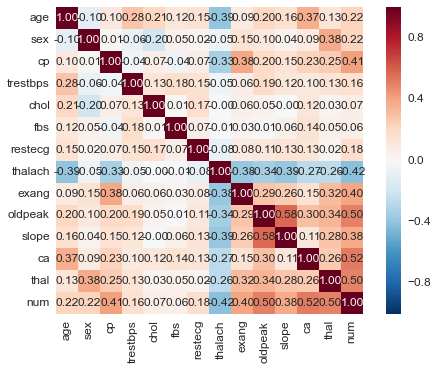

In [8]:
cols = df.columns.values
cm = np.corrcoef(df[cols].values, rowvar=0)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 12},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

In [9]:
# Separate the features from the label.
df_X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
df_y = df['num']

## K-Means

In [10]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

Visualize if K-Means classifies the dataset correctly by showing two features. 

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


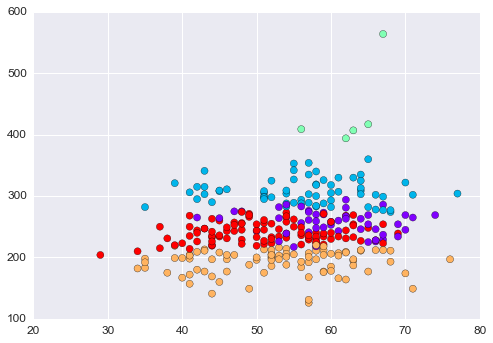

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

df_X_values = df_X.values
est = KMeans(n_clusters=5,random_state=10)
y_kmeans = est.fit_predict(df_X_values)

plt.scatter(df_X_values[:, 0], df_X_values[:, 4], c=y_kmeans, s=50, cmap='rainbow');

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


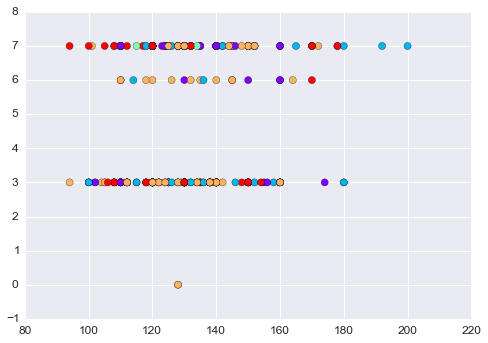

In [12]:
plt.scatter(df_X_values[:, 3], df_X_values[:, 12], c=y_kmeans, s=50, cmap='rainbow');

In [30]:
# Permute labels from the clusters so that they are the same as the real labels.
from scipy.stats import mode

y = df_y.as_matrix()
labels = np.zeros_like(y_kmeans)
for i in range(5):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


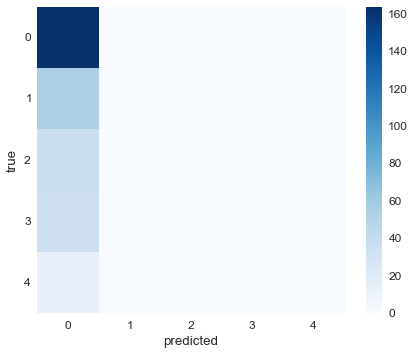

In [14]:
plt.imshow(confusion_matrix(df_y, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Clearly the accuracy is not good.

I've researched why all predicted labels are zero. This is because when permuting the labels, it gets all predictions per cluster, and tries to guess the corresponding label based on what value is the most ocurring. But, the most occuring value is 0 (no breast cancer), so this fails miserably.

I don't think it is possible to use K-Means here.

## Classifiers

In [15]:
# Build a decision tree
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=22)

# Show the 'array' size of the numerical data
X_train.shape, y_train.shape

((227, 13), (227,))

Play with some classifiers to see which is the most accurate.

In [16]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(max_depth=3)
clf_dt = clf_dt.fit(X_train, y_train)

# And call this method for the training data (display only accuracy)
measure_performance(X_test, y_test, clf_dt, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.618 



In [17]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf = clf_rf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf_rf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.671 



Okay, this accuracy is not great. Now remove some features to see if the accuracy improves.

In [18]:
df_X2 = df[['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_X2, df_y, test_size=0.25, random_state=22)

clf_rf2 = RandomForestClassifier(n_estimators=60, max_features=None, max_depth=4)

clf_rf2 = clf_rf2.fit(X_train2, y_train2)

measure_performance(X_test2, y_test2, clf_rf2, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.592 



In [19]:
clf_dt2 = tree.DecisionTreeClassifier(max_depth=3)

clf_dt2 = clf_dt2.fit(X_train2, y_train2)

measure_performance(X_test2, y_test2, clf_dt2, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.618 



The `DecisionTreeClassifier` still performs worse then the `RandomForestClassifier`. It looks like that removing the age and sex features has a small positive impact on the accuracy. So for the real prediction it's better to remove those features.

In [20]:
def trainRandom(**kwargs):
    # Use parameter unpacking to pass through params.
    clf_r = RandomForestClassifier(**kwargs)

    clf_r = clf_r.fit(X_train2, y_train2)
    
    print('For settings: ' + str(kwargs))
    measure_performance(X_test2, y_test2, clf_r, show_classification_report=False, show_confusion_matrix=False)

# Test max depth
depths = list(range(1, 10))
depths.append(None)
for i in depths:
    trainRandom(max_depth=i)

For settings: {'max_depth': 1}
Accuracy:0.579 

For settings: {'max_depth': 2}
Accuracy:0.632 

For settings: {'max_depth': 3}
Accuracy:0.592 

For settings: {'max_depth': 4}
Accuracy:0.684 

For settings: {'max_depth': 5}
Accuracy:0.618 

For settings: {'max_depth': 6}
Accuracy:0.605 

For settings: {'max_depth': 7}
Accuracy:0.579 

For settings: {'max_depth': 8}
Accuracy:0.645 

For settings: {'max_depth': 9}
Accuracy:0.645 

For settings: {'max_depth': None}
Accuracy:0.605 



In [21]:
# Test n_estimators
estimators = [5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]

for i in estimators:
    trainRandom(n_estimators=i)

For settings: {'n_estimators': 5}
Accuracy:0.539 

For settings: {'n_estimators': 7}
Accuracy:0.566 

For settings: {'n_estimators': 10}
Accuracy:0.632 

For settings: {'n_estimators': 20}
Accuracy:0.632 

For settings: {'n_estimators': 30}
Accuracy:0.645 

For settings: {'n_estimators': 40}
Accuracy:0.632 

For settings: {'n_estimators': 50}
Accuracy:0.632 

For settings: {'n_estimators': 60}
Accuracy:0.658 

For settings: {'n_estimators': 70}
Accuracy:0.645 

For settings: {'n_estimators': 80}
Accuracy:0.658 

For settings: {'n_estimators': 90}
Accuracy:0.618 

For settings: {'n_estimators': 100}
Accuracy:0.618 

For settings: {'n_estimators': 200}
Accuracy:0.645 

For settings: {'n_estimators': 300}
Accuracy:0.658 



In [22]:
# Test max_features with all possible settings
features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'sqrt', 'log2', None]

for i in features:
    trainRandom(max_features=i)

For settings: {'max_features': 1}
Accuracy:0.605 

For settings: {'max_features': 2}
Accuracy:0.671 

For settings: {'max_features': 3}
Accuracy:0.711 

For settings: {'max_features': 4}
Accuracy:0.605 

For settings: {'max_features': 5}
Accuracy:0.566 

For settings: {'max_features': 6}
Accuracy:0.645 

For settings: {'max_features': 7}
Accuracy:0.632 

For settings: {'max_features': 8}
Accuracy:0.645 

For settings: {'max_features': 9}
Accuracy:0.684 

For settings: {'max_features': 10}
Accuracy:0.658 

For settings: {'max_features': 11}
Accuracy:0.579 

For settings: {'max_features': 'sqrt'}
Accuracy:0.645 

For settings: {'max_features': 'log2'}
Accuracy:0.658 

For settings: {'max_features': None}
Accuracy:0.618 



This is nice, but the parameters behave different if another parameter is changed. So I want to test every parameter combined. This results in > 1900 tests, so we want to determine the best parameter combination automatically.

In [23]:
from operator import itemgetter

def accuracySimple(X, y, **kwargs):
    myclf = RandomForestClassifier(random_state=22, **kwargs)
    myclf = myclf.fit(X, y)
    y_pred = myclf.predict(X)
    return metrics.accuracy_score(y, y_pred)

tests = []

test_count = len(depths) * len(estimators) * len(features)
print('Ran ' + str(test_count) + ' tests to see what parameters combined produce the highest accuracy.')

# This is quite CPU intensive. Test every parameter combination and return the highest accuracy that we got.
for depth in depths:
    for estimator in estimators:
        for feature in features:
            params = {'max_depth': depth, 'n_estimators': estimator, 'max_features': feature}
            score = accuracySimple(X_test2, y_test2, **params)
            # insert every param combination with the accuracy score in a tuple.
            tests.append((params, score))

# Show top 10 results with highest accuracy.
sorted(tests, key=itemgetter(1), reverse=True)[:10]

Ran 1960 tests to see what parameters combined produce the highest accuracy.


[({'max_depth': 5, 'max_features': 4, 'n_estimators': 20}, 1.0),
 ({'max_depth': 5, 'max_features': 6, 'n_estimators': 20}, 1.0),
 ({'max_depth': 5, 'max_features': 7, 'n_estimators': 20}, 1.0),
 ({'max_depth': 5, 'max_features': 9, 'n_estimators': 20}, 1.0),
 ({'max_depth': 5, 'max_features': 11, 'n_estimators': 20}, 1.0),
 ({'max_depth': 5, 'max_features': None, 'n_estimators': 20}, 1.0),
 ({'max_depth': 5, 'max_features': 6, 'n_estimators': 30}, 1.0),
 ({'max_depth': 5, 'max_features': 7, 'n_estimators': 30}, 1.0),
 ({'max_depth': 5, 'max_features': 8, 'n_estimators': 30}, 1.0),
 ({'max_depth': 5, 'max_features': 9, 'n_estimators': 30}, 1.0)]

## Prediction

The `RandomForestClassifier` seems somewhat more accurate. Now let's predict something!

In [24]:
# Now insert ALL data we have to train the model.
clf_real = RandomForestClassifier(n_estimators=20, max_depth=5, max_features=4)

clf_real = clf_real.fit(df_X2, df_y)

In [25]:
def predict(X):
    # we could also simply use an array, but allowing to use
    # tuples [(feature_name, value)] makes it much easier to read.
    X_values = [v for k,v in X]

    prediction = clf_real.predict(X_values)[0]

    # The prediction outcomes can be 0, 1, 2, 3 or 4.
    # Unfortunately we only know that 0 means there is no heart disease.
    if prediction == 0:
        print('This patient should not have a heart disease!')
    else:
        print('This patient has diagnosis number ' + str(prediction) + '.')

In [26]:
predict([
    ('cp', 4),
    ('trestbps', 160),
    ('chol', 286),
    ('fbs', 0),
    ('restecg', 2),
    ('thalach', 108),
    ('exang', 1),
    ('oldpeak', 1.5),
    ('slope', 2),
    ('ca', 3.1),
    ('thal', 3.1)
])

This patient has diagnosis number 2.


In [27]:
predict([
    ('cp', 2),
    ('trestbps', 135),
    ('chol', 204),
    ('fbs', 0),
    ('restecg', 2),
    ('thalach', 172),
    ('exang', 0),
    ('oldpeak', 1.4),
    ('slope', 1),
    ('ca', 0.0),
    ('thal', 3.0)
])

This patient should not have a heart disease!
